In [1]:
import scipy.io as sio
import numpy as np
from scipy.optimize import minimize 
import matplotlib.pyplot as plt

In [2]:
data=sio.loadmat('ex5data1')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [3]:
X=data['X']
y=data['y']
Xtest=data['Xtest']
ytest=data['ytest']
Xval=data['Xval']
yval=data['yval']

In [4]:
#cost function
def costFun(theta,X,y,lam):
    cost=np.sum(np.power((X@theta-y.flatten()),2))+theta[1:]@theta[1:]*lam
    return cost/(2*len(y))

In [5]:
def gradi(theta,X,y,lam):
    grad=(X@theta-y.flatten())@X+theta[1:]*lam
    return grad/len(y)

In [7]:
X=np.insert(X,0,1,1)
y=y.flatten()
print(X.shape,y.shape)

(12, 2) (12,)


In [9]:
theta_ini=np.ones(X.shape[1])

In [11]:
costFun(theta_ini,X,y,lam=1)

303.9931922202643

In [15]:
def optim(X,y):
    res=minimize(fun=costFun,x0=theta_ini,args=(X,y,10),jac=gradi,method='TNC',options={'maxiter':300})
    return res.x

In [16]:
result=optim(X,y)

In [17]:
pred=X@result

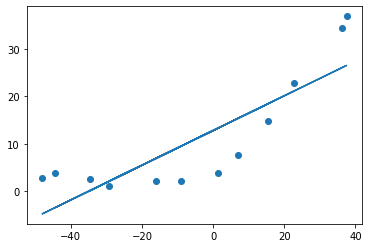

In [24]:
plt.scatter(X[:,1],y)
plt.plot(X[:,1],pred)